In [7]:
try:
  !pip install faiss-cpu --no-cache
  print('Installed')
except:
  print('failed')

Installed


In [8]:
import faiss 

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import glob
import pickle
import re

from skimage.io import imread
from sklearn.metrics.pairwise import cosine_similarity
import scipy as sc

import io
import sys
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
with open('/content/drive/MyDrive/ADM/Cdiscount/fourteen_images_dict_pickle','rb') as f:
  images = pickle.load(f)

In [15]:
del(images)

In [10]:
file_paths_temp = glob.glob('/content/drive/MyDrive/ADM/Cdiscount/Embeddings/*npz')
file_paths_temp[:10]

['/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31662.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31667.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31668.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31669.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31671.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31672.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31673.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31675.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31676.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/31677.npz']

In [11]:
def sort_glob(file):
  file_path_dic ={}
  for f in file:
    file_path_dic[int(re.findall('[0-9]+',f)[0])] = f

  file_paths = []
  sorted_file_path = sorted(file_path_dic.items())

  for tup in sorted_file_path:
    file_paths.append(tup[1])
  
  return file_paths

In [12]:
file_paths = sort_glob(file_paths_temp)
file_paths[:10]

['/content/drive/MyDrive/ADM/Cdiscount/Embeddings/2.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/5.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/11.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/13.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/14.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/17.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/21.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/22.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/23.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Embeddings/27.npz']

In [25]:
start_time = time.time()
d = 86016

index = faiss.IndexFlatIP(d)

picture_ids =[]
for file in tqdm(file_paths):
  npz_file = np.load(file)
  picture_id = int(re.findall('[0-9]+',file)[0])
  picture_ids.append(picture_id)
  #index.train(npz_file['arr_0'].reshape(1,86016))
  arr = npz_file['arr_0'].reshape(1,86016)
  faiss.normalize_L2(arr)
  index.add(arr)                  # add vectors to the index
end_time = time.time() - start_time
#print(index.ntotal)

100%|██████████| 14554/14554 [01:51<00:00, 130.78it/s]


In [14]:
#end_time = "1:09:44"
print(end_time)

4143.525082111359


In [31]:
faiss.write_index(index,"/content/drive/MyDrive/ADM/Cdiscount/faiss_index.index_Norm")

In [11]:
index_1 = faiss.read_index('/content/drive/MyDrive/ADM/Cdiscount/faiss_index.index_1')

# single lookup

In [17]:
test = np.load('/content/drive/MyDrive/ADM/Cdiscount/Embeddings/501.npz')['arr_0']
l = 1

# Bulk lookup

In [32]:
array = file_paths[2:5]
test = []
for x in array:
  test.append(np.load(x)['arr_0'])
l = len(test)
test = np.array(test)

In [34]:
test.shape

(3, 86016)

In [35]:

xq = test.reshape(l,86016)
k = 4                          # we want 4 similar vectors
D,I = index.search(xq, k)   # actual search)
print(I)

[[    2  1464   778  1411]
 [    3  9667  9688 11447]
 [    4  7528  1456  8025]]


In [19]:
print(D)

[[5.4730475e+13 5.2973581e+13 4.8064782e+13 4.7894384e+13]]


In [27]:
result = [int(re.findall('[0-9]+',x)[0])for x in [file_paths[fi] for fi in I[0]]]
result

[501, 11468, 11912, 11911]

In [49]:
bulk_res = [int(re.findall('[0-9]+',file_paths[fi])[0]) for row in I for fi in row] 

In [ ]:
bulk_result = [[int(re.findall('[0-9]+',file_paths[fi])[0]) for fi in row] for row in I ] 

In [ ]:
file_paths[]

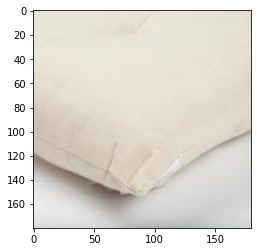

In [40]:
plt.imshow(images[11])

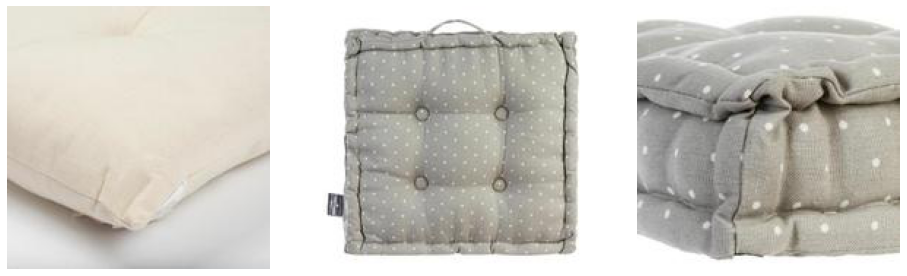

In [51]:
length_1 = len(test)
f, ax = plt.subplots(1, length_1, figsize=(16, 8))
for i, img in enumerate([11,13,14]):
  ax[i].imshow(images[img])
  ax[i].set_axis_off()

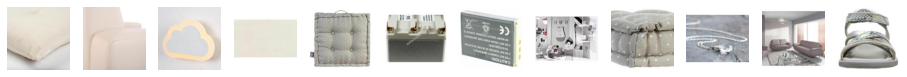

In [50]:
length = I.shape[0]*I.shape[1]
f, ax = plt.subplots(1, length, figsize=(16, 8))
for i, img in enumerate(bulk_res):
  ax[i].imshow(images[img])
  ax[i].set_axis_off()